# Test Notebook for using PyTorch on CIFAR10 dataset

In [1]:
import torch
from torchvision.datasets import CIFAR10

train_data = CIFAR10(root = './train/',
                     train = True,
                     download = True)

Files already downloaded and verified


In [2]:
train_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./train/
    Split: Train

In [3]:
train_data.data.shape

(50000, 32, 32, 3)

In [4]:
train_data.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
train_data.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [6]:
data, label = train_data[0]

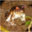

In [7]:
data

In [8]:
label

6

In [9]:
train_data.classes[label]

'frog'

In [10]:
# Dowload test data, with transform applied
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(
        mean = (0.4914, 0.4822, 0.4465),
        std = (0.2023, 0.1994, 0.2010))])

train_data = CIFAR10(root = './train/',
                     train = True,
                     download = True,
                     transform = train_transforms)

Files already downloaded and verified


In [11]:
data, label = train_data[0]
data

tensor([[[-0.0835, -0.0060,  0.0910,  ..., -1.6924, -1.7894, -2.4291],
         [-0.9752, -0.7426, -0.4324,  ..., -1.2854, -1.4598, -2.4291],
         [-1.7506, -1.1303, -0.7232,  ..., -0.8007, -1.0527, -2.4291],
         ...,
         [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
         [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
         [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291]],

        [[-0.7466, -0.7072, -0.6482,  ..., -2.0249, -1.9266, -2.4183],
         [-1.4939, -1.2972, -1.1006,  ..., -1.7889, -1.7889, -2.4183],
         [-2.2216, -1.6512, -1.3562,  ..., -1.3759, -1.4742, -2.4183],
         ...,
         [-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183],
         [-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183],
         [-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183]],

        [[-1.2849, -1.2459, -1.2459,  ..., -2.1434, -1.8897, -2.2214],
         [-1.7727, -1.6946, -1.5971,  ..., -2

In [12]:
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        (0.4914, 0.4822, 0.4465),
        (0.2023, 0.1994, 0.2010))])

test_data = CIFAR10(
    root = './test/',
    train = False,
    transform = test_transforms)

### Data Batching

In [13]:
trainloader = torch.utils.data.DataLoader(
    train_data,
    batch_size = 16,
    shuffle = True)

In [14]:
# retrieve a batch of samples
data_batch, labels_batch = next(iter(trainloader))
data_batch.size()

torch.Size([16, 3, 32, 32])

In [15]:
labels_batch.size()

torch.Size([16])

In [16]:
labels_batch

tensor([9, 5, 8, 3, 1, 3, 6, 6, 9, 5, 9, 6, 8, 6, 8, 0])

In [17]:
testloader = torch.utils.data.DataLoader(
    test_data,
    batch_size = 16,
    shuffle = False)